## **File: renaming_usage_umaps_with_Cell_Types.ipynb**
Description: This file renomes usages in umaps for easy identification. <br>
Final function is in cnmf_plotting_utils.py

#### **IMPORTS**

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
import from nmf_plotting_function.

#### **Data Input**

In [2]:
immu_excl_nmf_adata = immu_excl_nmf_adata = sc.read_h5ad(
    "/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf_k25_dt0_05.h5ad"
    )

#### **Dictionary with Usages and Cell Types**
These were determined prevouisily in thsi notebook: <br>


In [3]:
rename_dict = {
    "usage_1":"Basal_cells",
    "usage_2":"T_cells_&_T_memory",
    "usage_3":"Fibroblast_1",
    "usage_4":"Adipocytes",
    "usage_5":"Endothelial_cells_1",
    "usage_6":"Cholangiocytes_1_&_Goblet",
    "usage_7":"Plasma_cells",
    "usage_8":"Macrophages_1",
    "usage_9":"Mast_cells",
    "usage_10":"Cholangiocytes_2",
    "usage_11":"TMCT", ## TMCT = TOO MANY CELL TYPES
    "usage_12":"Smooth_Muscle_Cells_1",
    "usage_13":"TMCT",
    "usage_14":"Smooth_Muscle_Cells_2",
    "usage_15":"Not_Specific",
    "usage_16":"Fibroblast_2",
    "usage_17":"Neutrophils",
    "usage_18":"Macropages_2",
    "usage_19":"T_&_NK_cells",
    "usage_20":"Fibroblast_3",
    "usage_21":"B_cell",
    "usage_22":"Goblet_cells",
    "usage_23":"Endothelial_cells_2",
    "usage_24":"Macrophages_3",
    "usage_25":"Fibroblast_4",
    }

#### **Function for plotting umaps**

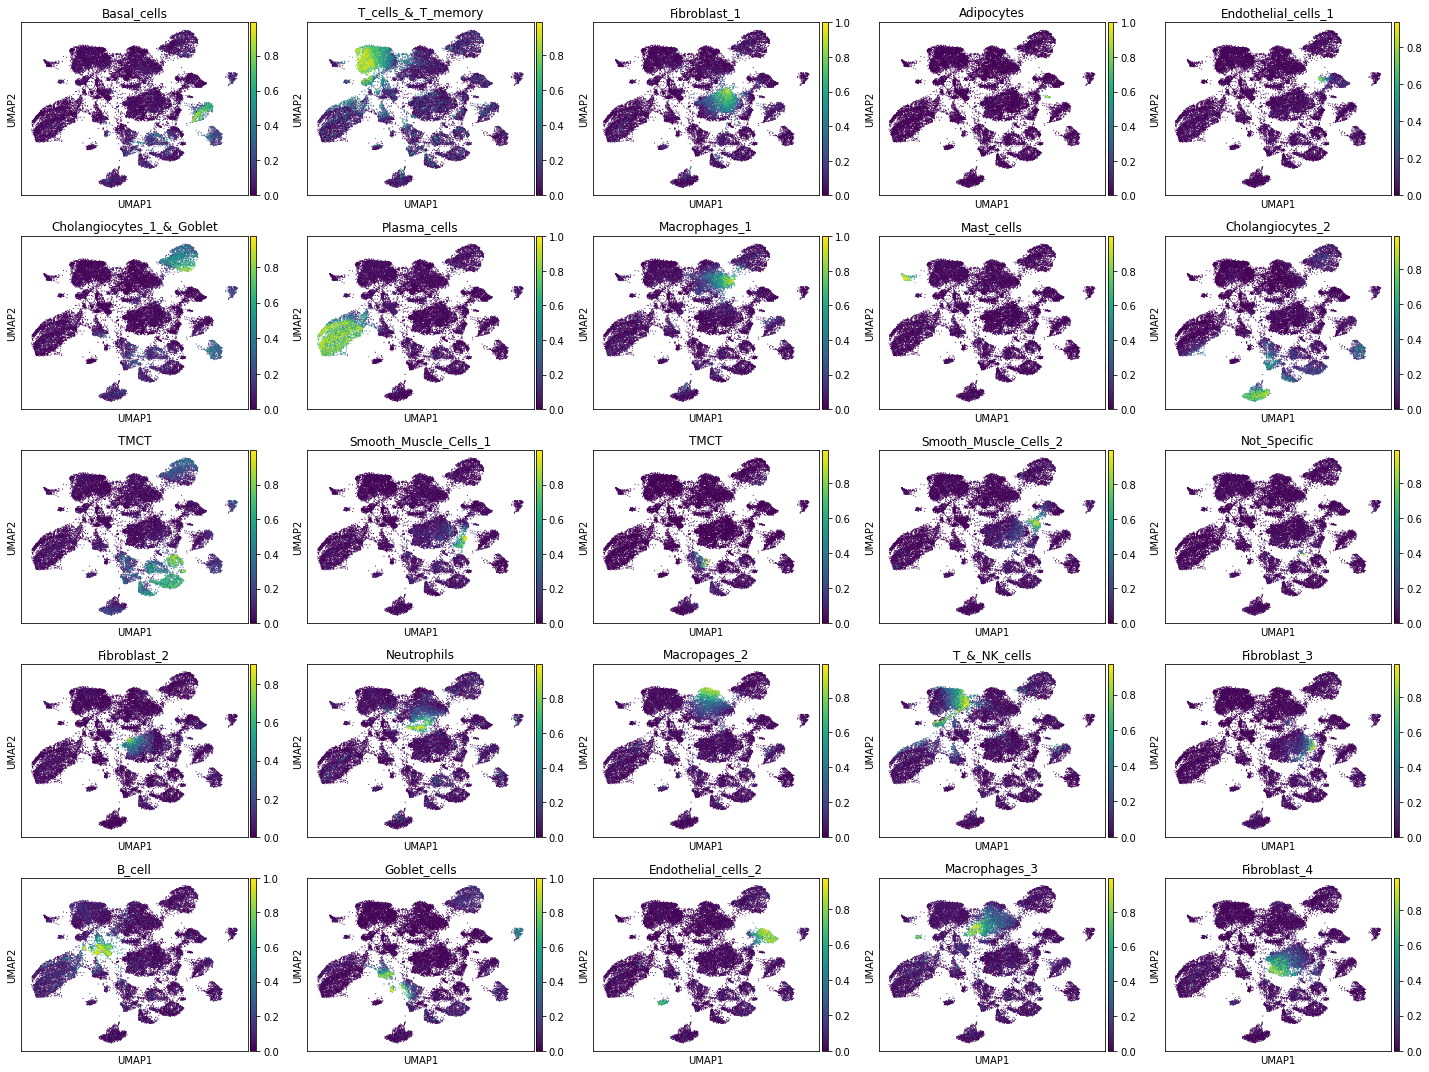

In [4]:
# Listing Usages
usage_cols = [f"usage_{i}" for i in range(1, 26)]

# Determine the number of rows and columns for subplots
n_cols = 5  
n_rows = (len(usage_cols) + n_cols - 1) // n_cols  # Ceiling division

# Set figure DPI for higher resolution
mpl.rcParams['figure.dpi'] = 1200  # Adjust DPI as needed (higher = higher resolution)

# Set background color to white
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(usage_cols):
    if col in immu_excl_nmf_adata.obs.columns:
        sc.pl.umap(immu_excl_nmf_adata, color=col, ax=axes[i], show=False)
        # Use rename_dict to get the new title
        new_title = rename_dict.get(col, col) #If col is not found in rename_dict use original col name.
        axes[i].set_title(new_title)
    else:
        print(f"Warning: Column '{col}' not found in adata.obs")
        axes[i].axis('off')

# Remove extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig("/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_excl_nmf_k25_usages_umap_plots.png")
